In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

In [2]:
x = [8.0,1,2.5,4,28.0]
x_with_nan = [8.0,1,2.5,math.nan,4,28.0]
print(x)
print(x_with_nan)

[8.0, 1, 2.5, 4, 28.0]
[8.0, 1, 2.5, nan, 4, 28.0]


In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
print(y)
print(y_with_nan)
print(z_with_nan)

[ 8.   1.   2.5  4.  28. ]
[ 8.   1.   2.5  nan  4.  28. ]
0     8.0
1     1.0
2     2.5
3     NaN
4     4.0
5    28.0
dtype: float64


In [5]:
mean_ = sum(x)/len(x)
mean_

8.7

In [6]:
mean_=statistics.mean(x)
print(mean_)

8.7


In [7]:
mean_=statistics.mean(x_with_nan)
print(mean_)

nan


In [8]:
mean_ = np.mean(y)
mean_

8.7

In [9]:
mean_=y.mean()
mean_

8.7

In [10]:
np.nanmean(y_with_nan)

8.7

In [11]:
z_with_nan.mean()

8.7

In [12]:
w=[0.1,0.2,0.3,0.25,0.15]

In [13]:
wmean=sum(w[i]*x[i] for i in range (len(x)))/sum(w)
print (wmean)

6.95


In [14]:
y,z,w = np.array(x), pd.Series(x), np.array(w)

wmean = np.average(y, weights=w)
print(wmean)

6.95


In [15]:
wmean = np.average(z, weights=w)
print(wmean)

6.95


In [16]:
hmean = len(x) / sum(1/item for item in x)
hmean

2.7613412228796843

In [17]:
scipy.stats.hmean(y)

2.7613412228796843

In [18]:
scipy.stats.hmean(z)

2.7613412228796843

In [19]:
scipy.stats.gmean(y)

4.67788567485604

In [20]:
gmean = 1

for item in x:
    gmean *= item

gmean **= 1/len(x)

gmean

4.677885674856041

In [21]:
#Median

In [22]:
statistics.median_low(x[:-1])

2.5

In [23]:
statistics.median_high(x[:-1])

4

In [25]:
statistics.median_high(x_with_nan)
statistics.median_low(x_with_nan)

4

In [28]:
median_=np.median(y)
print(median_)

4.0


In [29]:
median_=np.median(y[:-1])
print(median_)

3.25


In [30]:
u = [2,3,2,8,12]
v = [12,15,12,15,21,15,12]

mode_ = max((u.count(item),item) for item in set(u))[1]
mode_

2

In [32]:
mode_ = statistics.mode(u)
mode_

2

In [33]:
u,v = np.array(u), np.array(v)
mode_=scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [34]:
mode_=scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [35]:
u,v,w = pd.Series(u), pd.Series(v), pd.Series([2,2,math.nan])
print(u.mode())
print(v.mode())
print(w.mode())

0    2
dtype: int32
0    12
1    15
dtype: int32
0    2.0
dtype: float64


# Measures of variability

In [37]:
#variance
n = len(x)
mean_ = sum(x)/n
var_=sum((item - mean_)**2 for item in x) / (n-1)
var_

123.19999999999999

In [39]:
var_ = statistics.variance(x)
var_

123.2

In [40]:
var_=np.var(y, ddof=1)
var_

123.19999999999999

In [41]:
var_=np.var(y, ddof=2)
var_

164.26666666666665

In [42]:
z.var(ddof=1)

123.19999999999999

In [43]:
# variance populasi
var_ = statistics.pvariance(x)
var_

98.56

In [44]:
var_ = statistics.variance(x)
var_

123.2

In [47]:
std_=var_**0.5
std_

11.099549540409287

In [48]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [49]:
np.std(y, ddof=1)

11.099549540409285

In [50]:
y.std(ddof=1)

11.099549540409285

In [51]:
z.std(ddof=1)

11.099549540409285

# Skewness

In [53]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False)

1.9470432273905927

In [54]:
scipy.stats.skew(y_with_nan, bias=False)

nan

In [56]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew()

1.9470432273905924

In [57]:
z_with_nan.skew()

1.9470432273905924

# Percentil

In [58]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

[8.0]

In [60]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [61]:
y = np.array(x)
np.percentile(y,5)

-3.44

In [62]:
np.percentile(y,95)

34.919999999999995

In [64]:
np.percentile(y, [25,50,75])
np.median(y)

8.0

In [65]:
np.ptp(y)

46.0

In [66]:
np.amax(y) - np.amin(y)

46.0

In [67]:
np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

27.0

In [69]:
quartiles = np.quantile(y, [0.25,0.75])

In [70]:
quartiles[1]-quartiles[0]

20.9

In [74]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [76]:
result = z.describe()
result

count     5.00000
mean      8.70000
std      11.09955
min       1.00000
25%       2.50000
50%       4.00000
75%       8.00000
max      28.00000
dtype: float64

# korelasi

In [77]:
x = list(range(-10,11))
y = [0,2,2,2,2,3,3,6,7,4,7,6,6,9,4,5,5,10,11,12,14]
x_,y_=np.array(x), np.array(y)
x__,y__=pd.Series(x_), pd.Series(y_)

In [79]:
cov_matrix = np.cov(x_,y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [80]:
cov_xy=x__.cov(y__)
cov_xy

19.95

In [81]:
cov_yx=y__.cov(x__)
cov_yx

19.95

# Pearson correlation product moment

In [82]:
r,p=scipy.stats.pearsonr(x_,y_)
r

0.8619500056316061

In [83]:
p

5.122760847201135e-07

In [84]:
scipy.stats.linregress(x_,y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201165e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [85]:
r=x__.corr(y__)
r

0.8619500056316061

# Working with 2D data

In [86]:
a = np.array([[1,1,1],
              [2,3,1],
              [4,9,2],
              [8,27,4],
              [16,1,1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [87]:
np.mean(a)

5.4

In [88]:
a.mean()

5.4

In [89]:
np.median(a)

2.0

In [90]:
a.var(ddof=1)

53.40000000000001

In [91]:
np.mean(a, axis=0)
#hasilnya per kolom dalam matrils a

array([6.2, 8.2, 1.8])

In [92]:
np.mean(a, axis=1)
#hasilnya per row dalam matriks a

array([ 1.,  2.,  5., 13.,  6.])

In [93]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(1, 27), mean=5.4, variance=53.40000000000001, skewness=2.264965290423389, kurtosis=5.212690982795767)

In [94]:
scipy.stats.describe(a, axis=0, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [95]:
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

# DataFrame

In [98]:
row_names=['first','second','third','fourth','fifth']
col_names=['A','B','C']
df=pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [99]:
df.mean()

A    6.2
B    8.2
C    1.8
dtype: float64

In [100]:
df.var()

A     37.2
B    121.2
C      1.7
dtype: float64

In [101]:
df.mean(axis=1)

first      1.0
second     2.0
third      5.0
fourth    13.0
fifth      6.0
dtype: float64

In [102]:
df['A']

first      1
second     2
third      4
fourth     8
fifth     16
Name: A, dtype: int32

In [103]:
df['A'].mean()

6.2

In [104]:
df['A'].var()

37.20000000000001

In [105]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [106]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [107]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [108]:
df.describe().at['mean','A']

6.2

# Visualize

In [110]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [111]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

<function matplotlib.pyplot.show(close=None, block=None)>

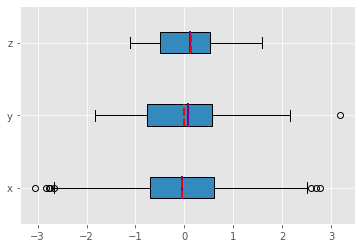

In [113]:
fig, ax = plt.subplots()
ax.boxplot((x,y,z), vert=False, showmeans=True, meanline=True,
          labels=('x','y','z'), patch_artist=True, medianprops={'linewidth':2, 'color':'purple'},
          meanprops={'linewidth':2, 'color':'red'})
plt.show